In [1]:
import pandas as pd
import numpy as np
from sympy import primerange
from numba import njit

from plot_conditions import plot_condition_matrix

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

Condition 4.1
$$b_2^4\cdot q=a^2+p\cdot b_1^4$$

In [2]:
@njit
def condition_41_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_q = b2**4 * q
            rhs = b2_4_q - p * b1_4
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)


Condition 4.2
$$b_2^4\cdot p\cdot q=a^2+b_1^4$$

In [3]:
@njit
def condition_42_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_pq = b2**4 * p * q
            rhs = b2_4_pq - b1_4
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Condition 4.3
$$b_2^4\cdot q=p\cdot b_1^4-a^2$$

In [4]:
@njit
def condition_43_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_q = b2**4 * q
            rhs = p * b1_4 - b2_4_q
            if rhs >= 0:
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Condition 4.4
$$b_2^4\cdot p\cdot q=b_1^4-a^2$$

In [5]:
@njit
def condition_44_numba(p, q, primes_b1, primes_b2):
    for b1 in primes_b1:
        b1_4 = b1**4
        for b2 in primes_b2:
            b2_4_pq = b2**4 * p * q
            rhs = b1_4 - b2_4_pq
            if rhs >= 0:
                # Use np.sqrt for compatibility with Numba
                a = int(np.sqrt(rhs))
                if a * a == rhs:
                    return (1, a, b1, b2)
    return (0, np.nan, np.nan, np.nan)

Create a DataFrame with pairs of odd primes, where each row represents a unique pair $(𝑝,q)$ with $𝑝<𝑞$.

In [6]:
primes = primerange(3, 7000) #6000
prime_list=list(primes)
#prime_list.reverse()
l = len(prime_list)

p_values = []
q_values = []
for i in range(len(prime_list)):
    for j in range(i + 1, l):
        p_values.append(prime_list[i])
        q_values.append(prime_list[j])

df_primes = pd.DataFrame({"p": p_values, "q": q_values}, dtype=np.int32)

In [7]:
b1_max = 200
b2_max = 200
primes_b1 = np.array(list(primerange(1, 10**6))[:b1_max], dtype=np.int64)
primes_b2 = np.array(list(primerange(1, 10**6))[:b2_max], dtype=np.int64)

In [8]:
df_primes[['condition_41', 'condition_41_a', 'condition_41_b1', 'condition_41_b2']] = df_primes.apply(lambda row: pd.Series(condition_41_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_41'] = df_primes['condition_41'].astype(np.int8)
df_primes[['condition_41_a', 'condition_41_b1', 'condition_41_b2']] = df_primes[['condition_41_a', 'condition_41_b1', 'condition_41_b2']].astype(pd.Int64Dtype())

In [9]:
df_primes[['condition_42', 'condition_42_a', 'condition_42_b1', 'condition_42_b2']] = df_primes.apply(lambda row: pd.Series(condition_42_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_42'] = df_primes['condition_42'].astype(np.int8)
df_primes[['condition_42_a', 'condition_42_b1', 'condition_42_b2']] = df_primes[['condition_42_a', 'condition_42_b1', 'condition_42_b2']].astype(pd.Int64Dtype())

In [10]:
df_primes[['condition_43', 'condition_43_a', 'condition_43_b1', 'condition_43_b2']] = df_primes.apply(lambda row: pd.Series(condition_43_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_43'] = df_primes['condition_43'].astype(np.int8)
df_primes[['condition_43_a', 'condition_43_b1', 'condition_43_b2']] = df_primes[['condition_43_a', 'condition_43_b1', 'condition_43_b2']].astype(pd.Int64Dtype())

In [11]:
df_primes[['condition_44', 'condition_44_a', 'condition_44_b1', 'condition_44_b2']] = df_primes.apply(lambda row: pd.Series(condition_44_numba(row['p'], row['q'], primes_b1, primes_b2)), axis=1)
df_primes['condition_44'] = df_primes['condition_44'].astype(np.int8)
df_primes[['condition_44_a', 'condition_44_b1', 'condition_44_b2']] = df_primes[['condition_44_a', 'condition_44_b1', 'condition_44_b2']].astype(pd.Int64Dtype())

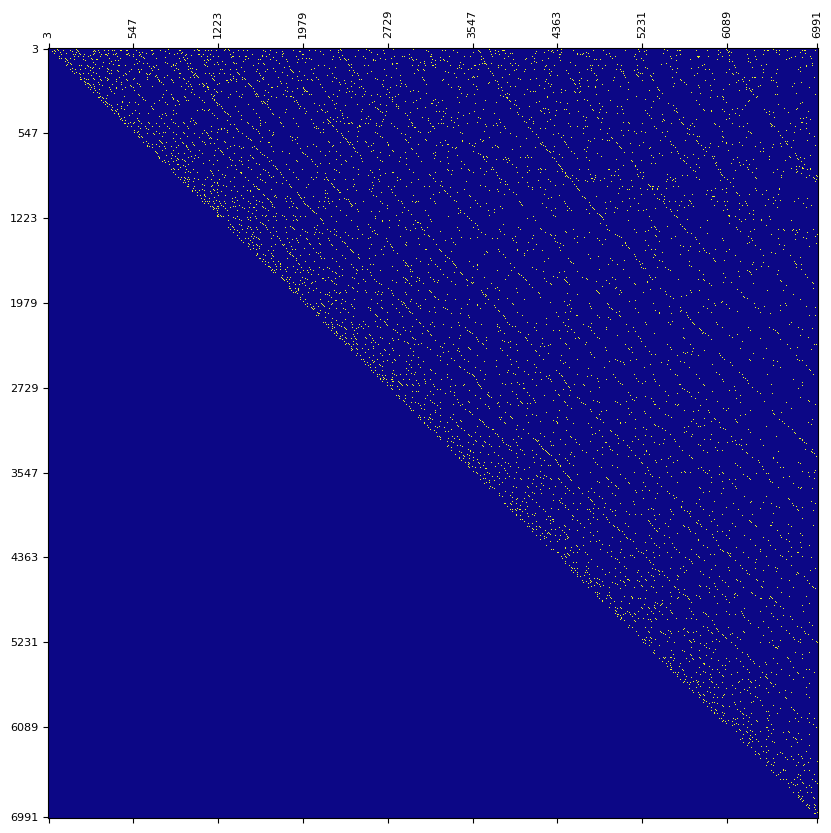

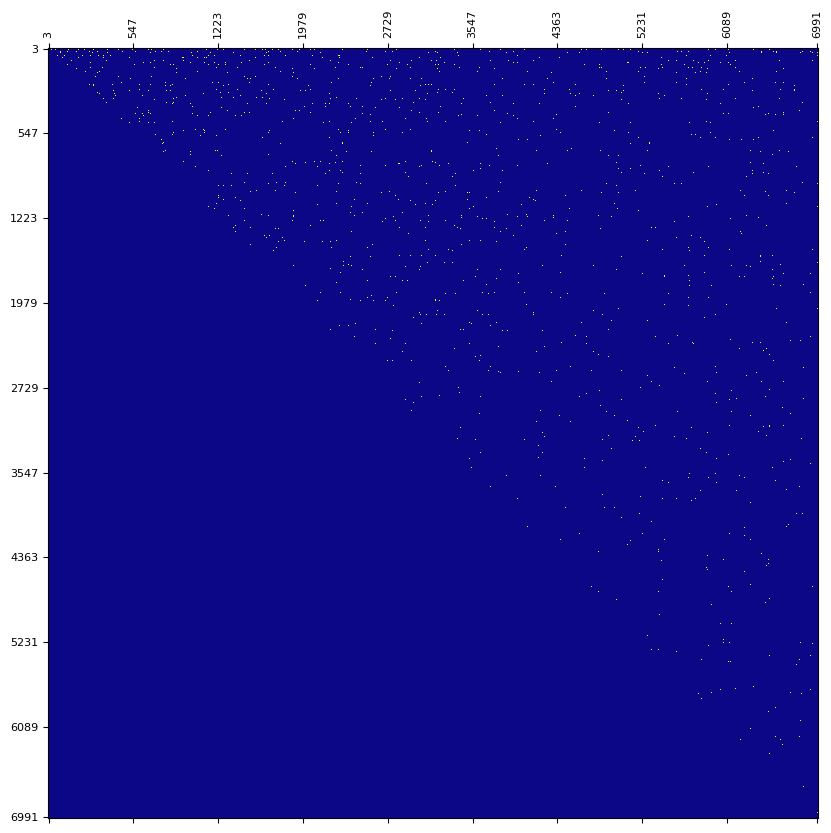

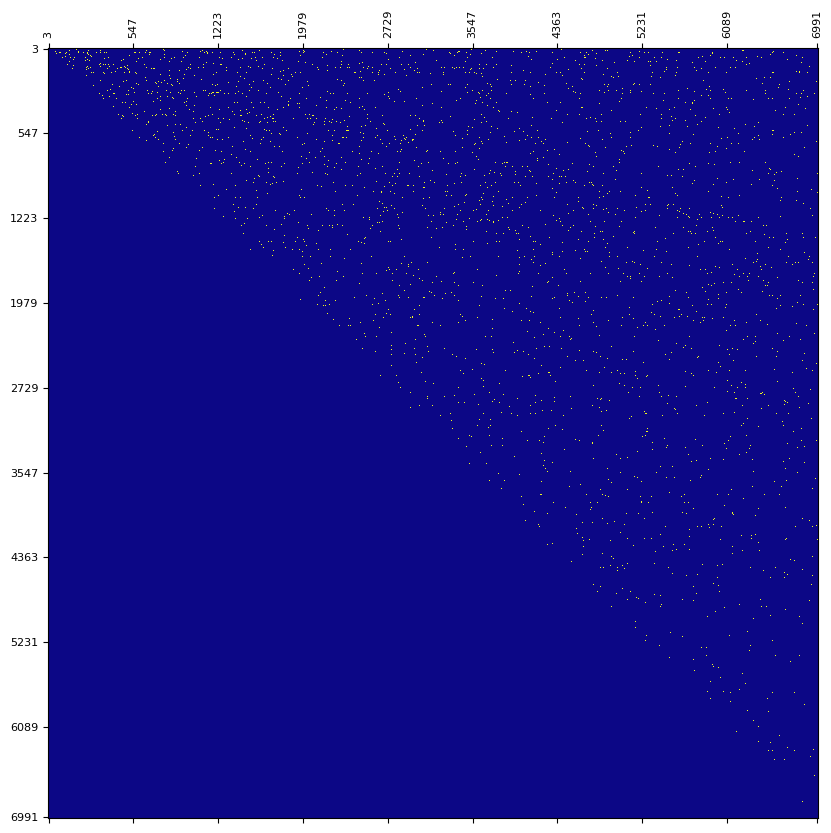

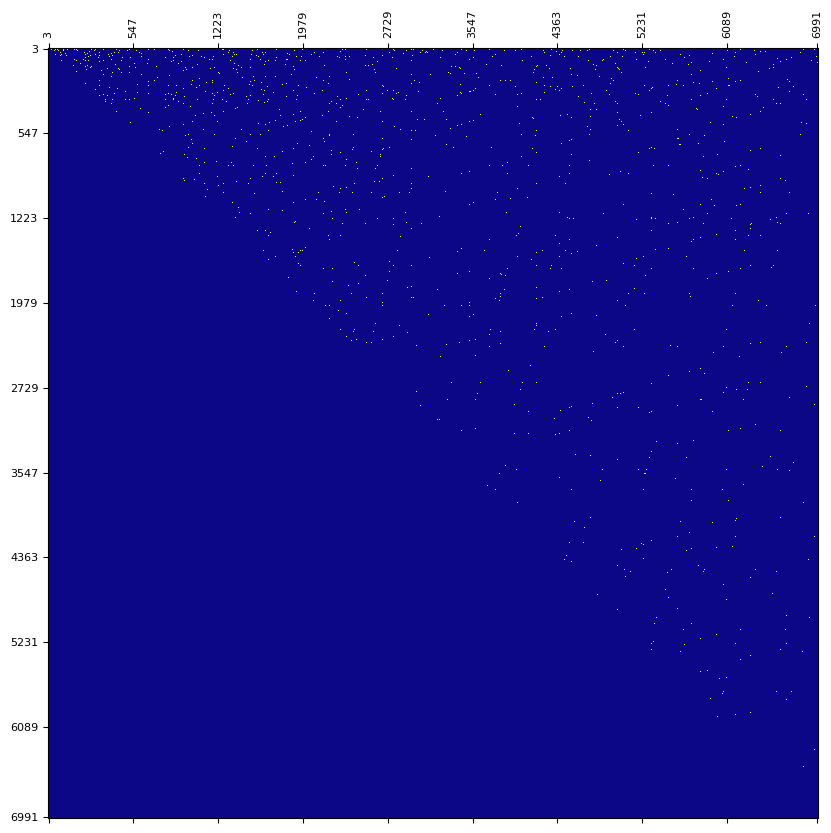

In [12]:
matrix_41, prime_map_41 = plot_condition_matrix(df_primes, 'condition_41', cmap="plasma") # cmap="inferno"
matrix_42, prime_map_42 = plot_condition_matrix(df_primes, 'condition_42', cmap="plasma") # cmap="inferno"
matrix_43, prime_map_43 = plot_condition_matrix(df_primes, 'condition_43', cmap="plasma") # cmap="inferno"
matrix_44, prime_map_44 = plot_condition_matrix(df_primes, 'condition_44', cmap="plasma") # cmap="inferno"